In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [12]:
data = "boston_small.csv"
df = pd.read_csv(data,skiprows=8)

In [13]:
print(df.shape)
print(df.info())
display(df.head())

(300, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    300 non-null    float64
 1   INDUS   300 non-null    float64
 2   RM      300 non-null    float64
 3   MEDV    300 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB
None


,CRIM,INDUS,RM,MEDV
0,0.00632,2.31,6.575,24.0
1,0.02731,7.07,6.421,21.6
2,0.02729,7.07,7.185,34.7
3,0.03237,2.18,6.998,33.4
4,0.06905,2.18,7.147,36.2


In [14]:
RM = df[["RM"]]  ## 説明変数 x
MEDV = df["MEDV"] ## 目的変数 y
display(RM.head())
display(MEDV.head())

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [15]:
X_C = sm.add_constant(RM)
model = sm.OLS(MEDV,X_C)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1242.
Date:                Thu, 29 May 2025   Prob (F-statistic):          2.71e-108
Time:                        20:53:10   Log-Likelihood:                -834.22
No. Observations:                 300   AIC:                             1672.
Df Residuals:                     298   BIC:                             1680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.0934      2.072    -22.730      0.0

In [16]:
print(result.rsquared)
print(result.params)


0.8064806004546003
const   -47.093397
RM       11.304407
dtype: float64


In [17]:
a0 = result.params["const"]
a1 = result.params["RM"]

x_test = 10
y_test = a0 + a1 * x_test
print(y_test)

65.95067725689783


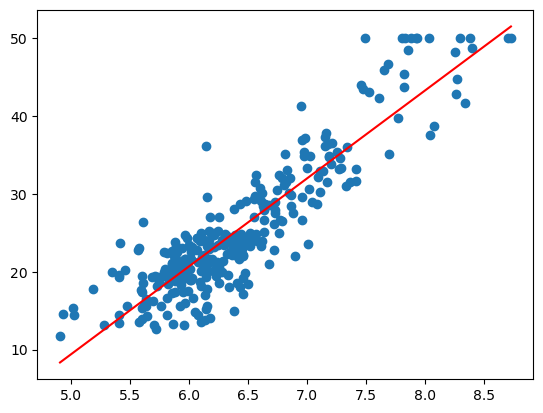

In [18]:
x_min = RM["RM"].min()
x_max = RM["RM"].max()

x_min_max = np.array([x_min,x_max])
y_min_max = a0 + a1 * x_min_max

plt.scatter(RM,MEDV)
plt.plot(x_min_max,y_min_max, color="red")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     13.94
Date:                Thu, 29 May 2025   Prob (F-statistic):           0.000226
Time:                        20:53:10   Log-Likelihood:                -1073.7
No. Observations:                 300   AIC:                             2151.
Df Residuals:                     298   BIC:                             2159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.7050      0.599     44.559      0.0

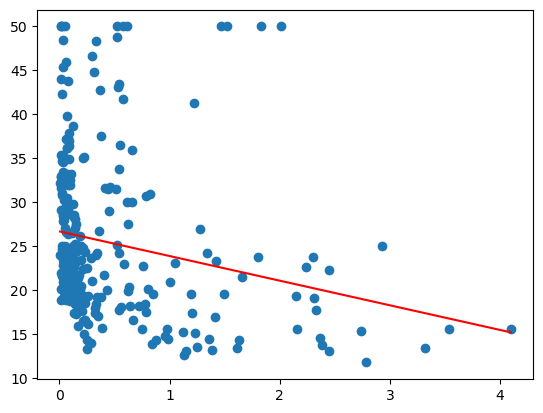

In [19]:
CRIM = df[["CRIM"]]  
MEDV = df["MEDV"]  

X_C = sm.add_constant(CRIM)
model = sm.OLS(MEDV, X_C)
result = model.fit()
print(result.summary())

print(result.rsquared)
print(result.params)

a0 = result.params["const"]
a1 = result.params["CRIM"]

x_test = 0.5 
y_test = a0 + a1 * x_test
print(y_test)

x_min = CRIM["CRIM"].min()
x_max = CRIM["CRIM"].max()

x_min_max = np.array([x_min, x_max])
y_min_max = a0 + a1 * x_min_max

plt.scatter(CRIM, MEDV)
plt.plot(x_min_max, y_min_max, color="red")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     55.38
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.07e-12
Time:                        20:53:10   Log-Likelihood:                -1055.0
No. Observations:                 300   AIC:                             2114.
Df Residuals:                     298   BIC:                             2121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.3788      0.810     37.527      0.0

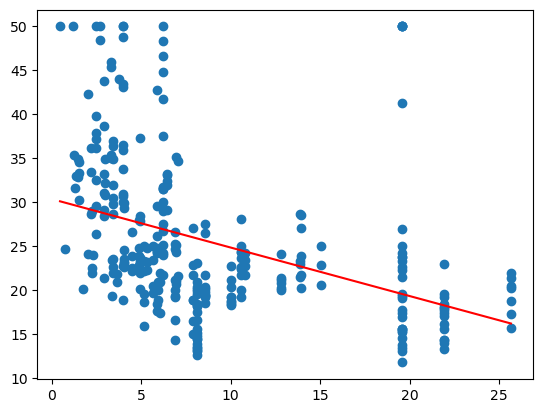

In [20]:
INDUS = df[["INDUS"]]  
MEDV = df["MEDV"]     

X_C = sm.add_constant(INDUS)
model = sm.OLS(MEDV, X_C)
result = model.fit()
print(result.summary())

print(result.rsquared)
print(result.params)

a0 = result.params["const"]
a1 = result.params["INDUS"]

x_test = 10  
y_test = a0 + a1 * x_test
print(y_test)

x_min = INDUS["INDUS"].min()
x_max = INDUS["INDUS"].max()

x_min_max = np.array([x_min, x_max])
y_min_max = a0 + a1 * x_min_max

plt.scatter(INDUS, MEDV)
plt.plot(x_min_max, y_min_max, color="red")